# Hi Axel!

Here is a little demo of how I draw my animations.
I simply use the function `animation.FuncAnimation` of `matplotlib`.

It consists in defining a figure `fig`, defining a function `animationManage`, defining an animation via `anim = animation.FuncAnimation(fig, animationManage, ...)`, and enventually saving this animation as a mp4 video with `anim.save('video.mp4',...)`.

This is well explained here: https://brushingupscience.com/2016/06/21/matplotlib-animations-the-easy-way/

**Caution:** I do not think that this code is well written, at least it works...

## A few functions to start

In [1]:
#librairies maths
import math
import scipy
import numpy as np
from scipy.interpolate import CubicSpline
from sklearn.decomposition import PCA

#librairies matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import animation, rc

#librairies affichage
import sys
from IPython.display import HTML
from IPython.display import clear_output 

def SampleOnCircle(N_signal = 100, N_outliers = 0, sd = 0):
    '''
    Sample N_signal points (signal) points from the uniform distribution on the unit circle in R^2, 
        and N_outliers points (outliers) from the uniform distribution on the unit square.
    If sd is nonzero, add a Gaussian noise to the points
        
    Input: 
    N_signal: number of sample points on the circle
    N_outliers: number of sample points on the square
    sd: standard deviation of the noise    
    
    Output : 
    data : a (N_signal + N_outliers)x2 matrix, the sampled points concatenated 
    '''
    rand_uniform = np.random.rand(N_signal)*2-1    
    X_signal = np.cos(2*np.pi*rand_uniform)
    Y_signal = np.sin(2*np.pi*rand_uniform)

    X_outliers = np.random.rand(N_outliers)*2-1
    Y_outliers = np.random.rand(N_outliers)*2-1

    X = np.concatenate((X_signal, X_outliers))
    Y = np.concatenate((Y_signal, Y_outliers))
    data = np.stack((X,Y)).transpose()
    
    data = data+np.random.normal(0,sd**2, np.shape(data)) #add noise

    return data

# First example: Cech filtration

The following save the Cech filtration of a point cloud as a video.

(-1.3258290650973028,
 1.2514432646191345,
 -1.2392256358054758,
 1.1828798095880615)

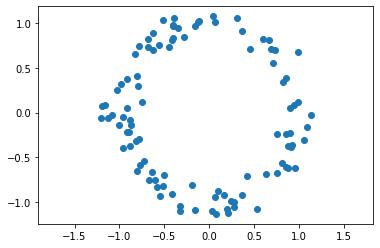

In [2]:
' Generate dataset '

X = SampleOnCircle(N_signal = 100, N_outliers = 0, sd = 0.3)

plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

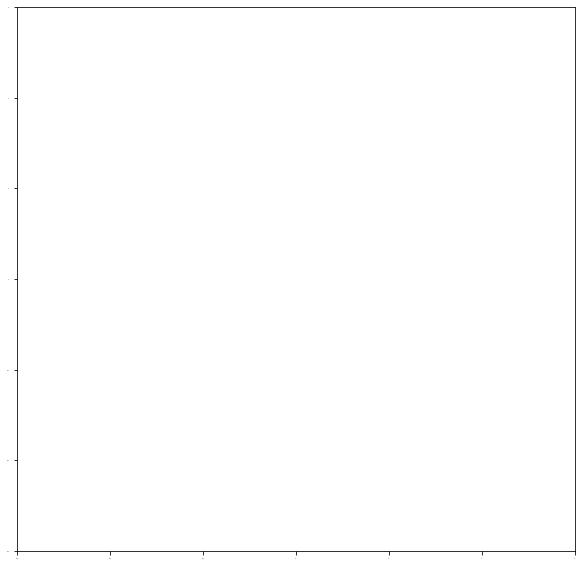

In [3]:
' Video parameters '

FPS = 10                     #frames per second
DPI = 100                    #quality of the video
time = 2                     #duration of the video
number_frames = time*FPS     #number of frames

radii = np.linspace(0,1,number_frames)    #radii used in the Cech filtrations

fig = plt.figure( figsize=(10,10) )     #define the figure
ax = fig.add_subplot(1, 1, 1)           #define the axis
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.xaxis.set_tick_params(labelsize=0)
ax.yaxis.set_tick_params(labelsize=0)


' Create the animationManage function '

def animationManage(i):
    clear_output(wait=True)
    print ('Iteration %i'%i+' over %i'%number_frames+'.')
    sys.stdout.flush()

    ax.clear()
    r = radii[i]
    #plot a disk around each point
    for j in range(np.shape(X)[0]):
        circle = plt.Circle((X[j,0], X[j,1]), r, color='magenta', alpha = .4)
        ax.add_artist(circle)
    #plot the points (center of the disks)
    for j in range(np.shape(X)[0]):
        point = plt.Circle((X[j,0], X[j,1]), .02, facecolor='black', edgecolor = 'black', alpha = 1)
        ax.add_artist(point)
        
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)

In [4]:
' Generate the animation '

anim = animation.FuncAnimation(fig, animationManage,
                               frames=number_frames,
                               interval=350,
                               blit=False,
                               repeat=False)

In [5]:
' Display the animation in the notebook '

HTML(anim.to_html5_video()) 

Iteration 12 over 20.


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '720x720', '-pix_fmt', 'rgba', '-r', '2.857142857142857', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmpkoz7zvij/temp.m4v']' returned non-zero exit status 255.

In [6]:
' Save the animation in the folder '

anim.save('video1.mp4',writer='ffmpeg',fps=FPS, dpi = DPI)

Iteration 19 over 20.


In [11]:
' Save the animation in the folder '

anim.save('video2.mp4',writer='ffmpeg',fps=FPS, dpi = DPI)

Iteration 59 over 60.


# Now computing persistence

We will do that with the **gudhi** library.

In [7]:
import gudhi

In [12]:
# compute rips complex

rips_complex = gudhi.RipsComplex(points=X, max_edge_length=1)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)

Rips complex is of dimension 2 - 15805 simplices - 100 vertices.


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

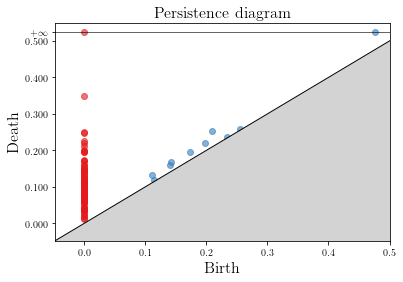

In [13]:
# compute and plot persistence diagram

barcode = simplex_tree.persistence(homology_coeff_field=2)

gudhi.plot_persistence_diagram(persistence=barcode)

You can read here one large $H_0$ feature (a connected component) in red, and one large $H_1$ feature (a hole) in blue.

# See you!